In [1]:
!pwd

/home/islambek/projects/atom-in-SMILES


In [2]:
!pip3 install selfies

In [3]:
!pip3 install --upgrade deepsmiles


In [4]:
!pip3 install SmilesPE

In [5]:
! pip3 install seaborn==0.12.2

In [6]:
import codecs
import tarfile

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem

import atomInSmiles
import selfies as sf
import deepsmiles
from SmilesPE.tokenizer import SPE_Tokenizer
from SmilesPE.tokenizer import atomwise_tokenizer

sns.set_theme()

In [7]:
def smiles_tokenizer(smi):
    """
    Tokenize a SMILES molecule or reaction
    """
    import re
    pattern =  "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    tokens = [token for token in regex.findall(smi)]
    assert smi == ''.join(tokens), f"{smi=}\t {''.join(tokens)=}"

    return ' '.join(tokens)

def get_rep(sent, l = 300):
    cnt = 0
    for i, w in enumerate(sent):
        if w in sent[max(i - l, 0):i]:
            cnt += 1
    return cnt

#repld = get_rep(test)
#repld


Extracting files...
data/steroids_final.data
data/metals_final.data
data/fda_final.data
data/lipids_final.data
data/naturals_final.data
data/isomer.data


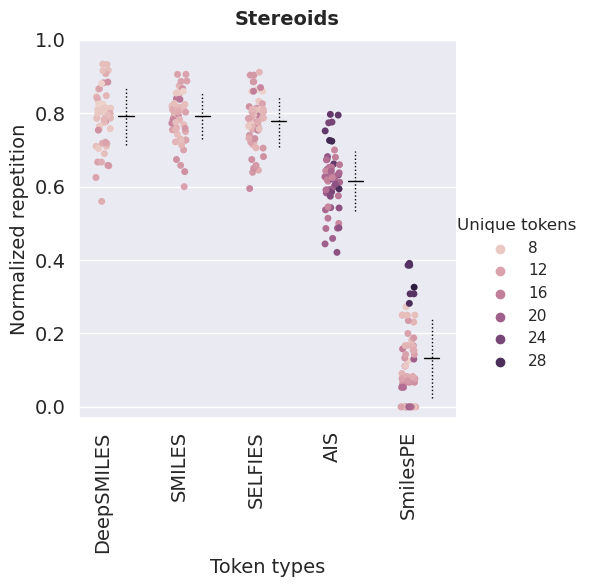

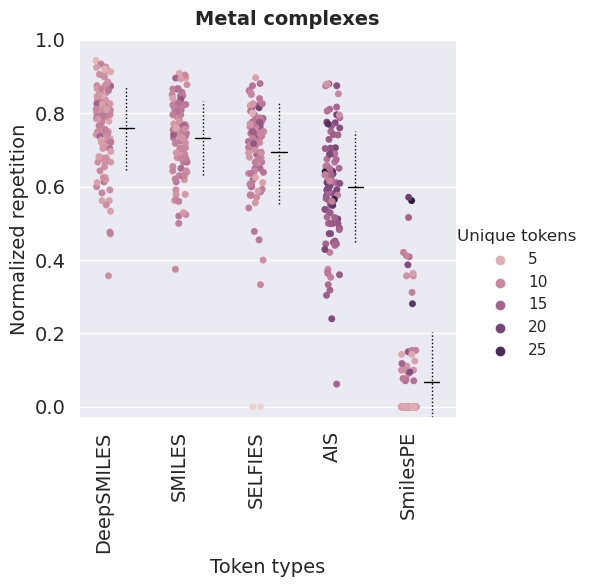

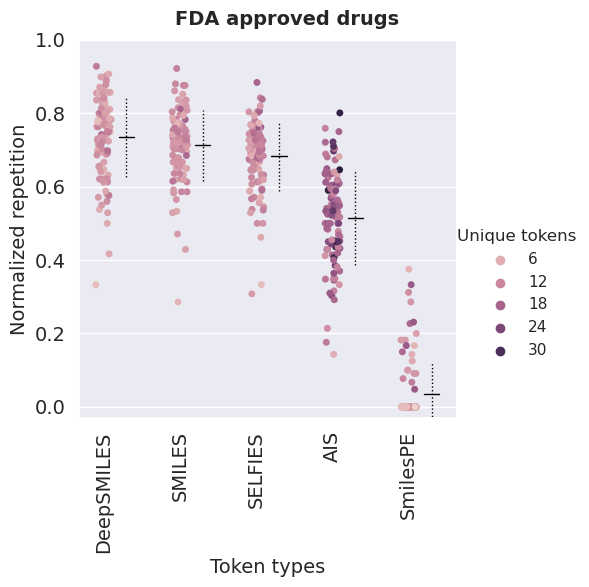

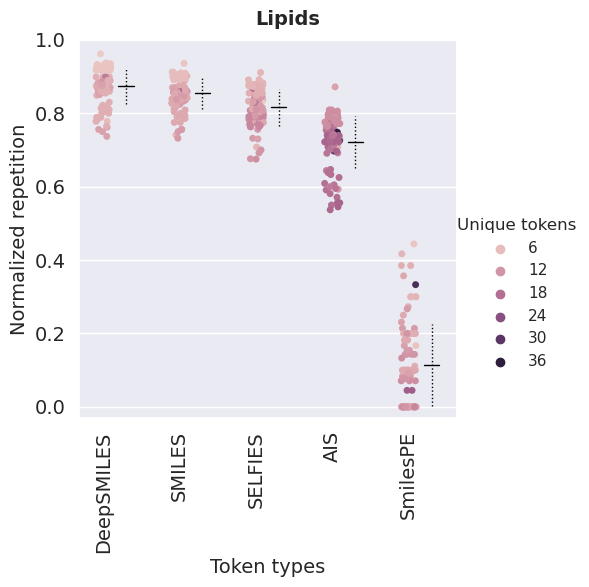

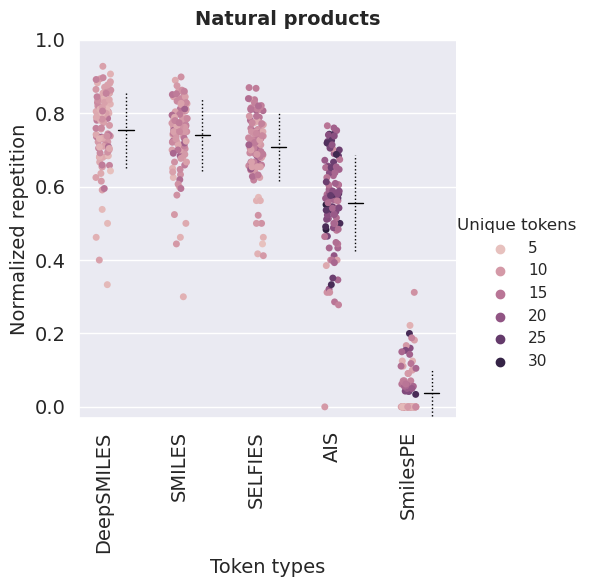

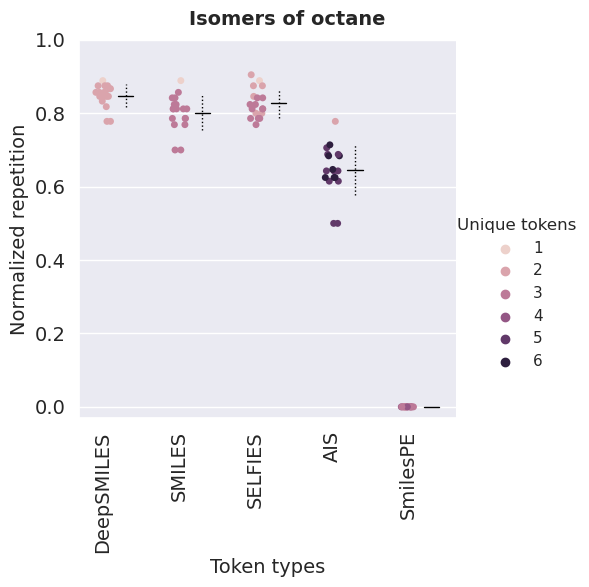

In [8]:
with tarfile.open('data/datum.tar.gz') as tarf:
    tarf.extractall('data')
    print(f"Extracting files...")

data_files = {
    'data/steroids_final.data': 'Stereoids',
    'data/metals_final.data': 'Metal complexes',
    'data/fda_final.data': 'FDA approved drugs',
    'data/lipids_final.data': 'Lipids',
    'data/naturals_final.data': 'Natural products',
    'data/isomer.data': 'Isomers of octane',
}

def create_catplot(data_files):
    for csv_file, subtitle in data_files.items():
        # Load data
        print(csv_file)
        df = pd.read_csv(csv_file, sep='\t', header=None)
        df.columns = ['Token types', 'Repetition', 'Normalized repetition', 'Length', 'Unique tokens']

        # Create catplot
        catplot = sns.catplot(
            data=df, x="Token types", y="Normalized repetition", hue="Unique tokens",
            native_scale=True, zorder=1
        )
        catplot.set(ylim=(-0.03, 1.0))
        catplot.set_xticklabels(rotation=90)
        catplot.set_xlabels("Token types", fontsize=14)
        catplot.set_ylabels("Normalized repetition", fontsize=14)
        # Set font size for hue legend
        #catplot.ax.legend(title="Unique tokens", fontsize=14)
        catplot.ax.tick_params(axis='x', labelsize=14)
        catplot.ax.tick_params(axis='y', labelsize=14)

        # Map the Token types to integers
        mapping = {'DeepSMILES': 0, 'SMILES': 1, 'SELFIES': 2, 'AIS': 3, 'SmilesPE': 4}
        df['Token types'] = df['Token types'].map(mapping)

        # Compute mean and standard deviation for each Token type
        mean_vals = df.groupby(['Token types'])['Normalized repetition'].mean()
        std_vals = df.groupby(['Token types'])['Normalized repetition'].std()

        # Plot the mean values and error bars
        for i, (mean_val, std_val) in enumerate(zip(mean_vals, std_vals)):
            x_pos = i  # the x position of the horizontal line
            y_pos = mean_val  # the y position of the horizontal line
            #color = sns.color_palette()[i]  # the color of the horizontal line
            plt.plot([x_pos + 0.2, x_pos + 0.4], [y_pos, y_pos], color='black', linestyle='-', linewidth=1)
            plt.plot([x_pos + 0.3, x_pos + 0.3], [y_pos - std_val, y_pos + std_val], linestyle=':',color='black', linewidth=1)

        # Add title and adjust margins
        catplot.fig.suptitle(subtitle, fontsize=14, fontweight='bold')
        plt.subplots_adjust(top=0.93, bottom=0.3)
        plt.gcf().set_size_inches(6, 6)

        # Save the plot
        plt.savefig(csv_file[:-5] + 'Ho.png')

        # Close the plot to free up memory
        # plt.close()

# Example usage

create_catplot(data_files)